<h2 style="color:red">Test Runtime for each algorithm</h2>

In [1]:
from lib import myDataset
from lib import proposed
from lib import sparseProposed
from lib import myPlot
from lib import otherMethods
import numpy as np
import time
from lib import runtime

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import scipy.sparse as sps

In [170]:
def Prototyping(X,numP):
    from sklearn.cluster import KMeans as km
    kmeans = km(init='k-means++',n_clusters=numP)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    return centers

def distance(p1,p2):
    ans = 0
    for i in xrange(p1.shape[0]):
        ans += (p1[i] - p2[i]) ** 2
#     print 'what the hell'
    return ans

def similarity(p1,p2,sigma):
    return np.exp((-distance(p1,p2))/(2*(sigma**2)))


from time import clock

def supervised(X,y,centers,sigma):
    t = []
    numS = X.shape[0]
    numP = centers.shape[0]
    numL = len(np.unique(sorted(y)))
    #-------------------------------------------------------------------
    t.append(clock())   
    N = numS+numP+numL
    # W = np.zeros((N,N))
    W = sps.lil_matrix((N,N))
    S_xp = np.array( [ [ similarity(X[i],centers[j],sigma) for j in xrange(numP)] for i in xrange(numS)] )
    #-------------------------------------------------------------------
    t.append(clock())
    W[:numS,numS:numS+numP] = S_xp
    W[numS:numS+numP,:numS] = S_xp.T
#     for i in xrange(numS):
#         for j in xrange(numP):
#             W[i,numS+j] = similarity(X[i],centers[j],sigma)
#             W[numS+j,i] = W[i,numS+j]
    #-------------------------------------------------------------------
    t.append(clock())
    P1 = np.sum(y)
    #-------------------------------------------------------------------
    t.append(clock())
    P2 = y.shape[0] - P1
    S_xl = np.column_stack((y,1-y))
    W[:numS,numS+numP:N] = S_xl
    W[numS+numP:N, : numS] = S_xl.T
#     for i in xrange(numS):
#         W[i,numS+numP+y[i]] = 1.
#         W[numS+numP+y[i],i] = 1.
    #-------------------------------------------------------------------
    t.append(clock())

    d = np.array(W.sum(axis=0))
    #-------------------------------------------------------------------
    t.append(clock())
    D = sps.dia_matrix((d,[0]),shape=(N,N))
    #-------------------------------------------------------------------
    t.append(clock())
    W = sps.csc_matrix(W)
    #-------------------------------------------------------------------
    t.append(clock())
    L = D - W
    #-------------------------------------------------------------------
    t.append(clock())
    for i in xrange(1,len(t)):
        print t[i] - t[i-1]
    return W,D,L

In [171]:
tmp1 = np.array([1,0,0,1,0])
tmp2 = np.column_stack((tmp1,1-tmp1))
tmp2

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1]])

In [172]:
X,y,name = myDataset.generateTwoGaussianNum(1000000)
centers = Prototyping(X,10)
sigma = 1

W,D,L = supervised(X,y,centers,sigma)


56.8526694049
10.5154922089
0.000785966229159
1.66385575037
16.0465987924
0.000202285329578
6.67839711887
0.502499266673


In [156]:
numS = X.shape[0]
numP = centers.shape[0]
numL = len(np.unique(sorted(y)))

t1 = clock()
N = numS+numP+numL

W = sps.lil_matrix((N,N))
S_xp = np.array( [ [ similarity(X[i],centers[j],sigma) for j in xrange(numP)] for i in xrange(numS)] )

W[:numS,numS:numS+numP] = S_xp
W[numS:numS+numP,:numS] = S_xp.T

# P1 = np.sum(y)
# P2 = y.shape[0] - P1

# for i in xrange(numS):
#     W[i,numS+numP+y[i]] = 1.
#     W[numS+numP+y[i],i] = 1.
# S_xl = np.array()


t2 = clock()
print t2-t1

6.73231824283


In [160]:
numS = X.shape[0]
numP = centers.shape[0]
numL = len(np.unique(sorted(y)))

t1 = clock()
N = numS+numP+numL


S_xp = np.array( [ [ similarity(X[i],centers[j],sigma) for j in xrange(numP)] for i in xrange(numS)] )


W = sps.bmat([np.zeros((numS,numS)),S_xp],[S_xp.T,None])
# P1 = np.sum(y)
# P2 = y.shape[0] - P1

# for i in xrange(numS):
#     W[i,numS+numP+y[i]] = 1.
#     W[numS+numP+y[i],i] = 1.
# S_xl = np.array()


t2 = clock()
print t2-t1

MemoryError: 

In [159]:
S_xp.shape

(100000L, 10L)

In [143]:
t1 = clock()
tmp = 
clock()-t1

0.5494970014769933

In [2]:
methods = [runtime.myLDA,runtime.myIsomap, runtime.myLLE, 
           runtime.myKPCA, runtime.myICA ]
mine = [runtime.unsupervised, runtime.supervised]

In [3]:
x1,x2,y,name = myDataset.generateConcentric()
X = np.zeros((x1.shape[0],2))
X[:,0] = x1
X[:,1] = x2

In [20]:
ansLDA = []
for N in range(100,6001,100):
    X,y,name = myDataset.generateTwoGaussianNum(N)
    tmp = runtime.myLDA(X,y)
    ansLDA.append(tmp)

In [5]:
ansLDA

[0.04854952006020229,
 0.0005475945403433796,
 0.0005108454508765611,
 0.0004949539527287564,
 0.0005317030421955679,
 0.0005614996012227244,
 0.000579377536639003,
 0.0006293695412290037,
 0.0006376463631809839,
 0.0006412881648398608,
 0.0006684361408423739,
 0.0006916112423079324,
 0.0007104823963584583,
 0.0007164417081638938,
 0.0009783203547247266,
 0.0009938807799944674,
 0.0008912481877898365,
 0.000842580474712154,
 0.0008462222763710309,
 0.0009091261232061221,
 0.0008819781472036159,
 0.0016722491071792106,
 0.000964084220967304,
 0.0009932186342383048,
 0.0010332784524859084,
 0.0011322692430316694,
 0.0012637051756291956,
 0.0011471675225452338,
 0.0011028037568825838,
 0.001102472684004513,
 0.0011081009229318567,
 0.0011494850326917855,
 0.0011683561867423253,
 0.0011839166120120453,
 0.0012041120575748965,
 0.001396134326860976,
 0.0013282643868546828,
 0.0013180011276342218,
 0.0013292576054889232,
 0.001450761351744087,
 0.0013242915123177351,
 0.00135011519680793,
 0

In [6]:
ansIsomap = []
for N in range(100,6001,100):
    print N
    X,y,name = myDataset.generateTwoGaussianNum(N)
    tmp = runtime.myIsomap(X,y)
    ansIsomap.append(tmp)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [19]:
ansLLE = []
for N in range(100,6001,100):
    print N
    X,y,name = myDataset.generateTwoGaussianNum(N)
    ansLLE.append(runtime.myLLE(X,y))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [8]:
ansKPCA = []
for N in range(100,6001,100):
    print N
    X,y,name = myDataset.generateTwoGaussianNum(N)
    ansKPCA.append(runtime.myKPCA(X,y))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [18]:
ansICA = []
for N in range(100,6001,100):
    print N
    X,y,name = myDataset.generateTwoGaussianNum(N)
    ansICA.append(runtime.myICA(X,y))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [13]:
ansS = []
for N in range(100,6001,100):
    print N
    X,y,name = myDataset.generateTwoGaussianNum(N)
    ansS.append(runtime.supervised(X,y,5,100))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [14]:
ansU2 = []
for N in range(100,6001,100):
    print N
    X,y,name = myDataset.generateTwoGaussianNum(N)
    ansU2.append(runtime.unsupervised(X,y,7,100))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [15]:
ansSupervised = []
for a in ansS:
    ansSupervised.append(a[1])
ansUnsupervised = []
for a in ansU2:
    ansUnsupervised.append(a[1])

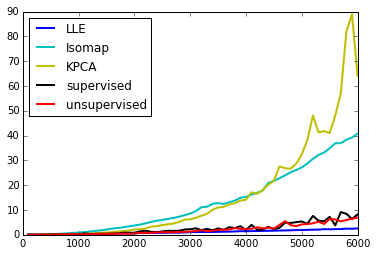

In [21]:
LWidth = 2.0
# plt.plot(range(100,5001,100),ansLDA,'ro-')
plt.plot(range(100,6001,100),ansLLE,'b-', label="LLE" ,linewidth=LWidth)
plt.plot(range(100,6001,100),ansIsomap,'c-',label="Isomap", linewidth=LWidth)
plt.plot(range(100,6001,100),ansKPCA,'y-', label="KPCA",linewidth=LWidth)
# plt.plot(range(100,5001,100),ansLDA,'go-')
plt.plot(range(100,6001,100),ansUnsupervised,'k-',label="supervised",linewidth=LWidth)
plt.plot(range(100,6001,100),ansSupervised,'r-', label = "unsupervised",linewidth=LWidth)

plt.legend(loc="upper left")
plt.savefig('runtime.png', format='png', dpi=1000)
plt.show()

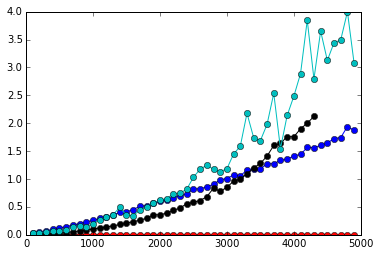

In [126]:
plt.plot(range(100,5000,100),ansLDA,'ro-')
plt.plot(range(100,5000,100),ansLLE,'bo-')
plt.plot(range(100,4400,100),ansUnsupervised,'ko-')
plt.plot(range(100,5000,100),ansSupervised,'co-')

In [ ]:
# for N in [10000,20000,50000,100000,200000,500000,1000000]:
#     print N
#     X,y,name = myDataset.generateTwoGaussianNum(N)
#     X.shape
#     for func in methods: 
#         print func.__name__
        
#         func(X,y)
#     for func in mine: 
#         try:
#             print func.__name__
#             print func(X,y,2,100)
#         except:
#             pass

In [4]:
X,y,name = myDataset.generateTwoGaussianNum(1000000)
X.shape

(1000L, 2L)

In [ ]:
sp = []
up = []
s = []
u = []
for P in xrange(5,60):
    t = runtime.supervised(X,y,P,10)
    sp.append(t[0])
    s.append(t[1])
    t = runtime.unsupervised(X,y,P,10)
    up.append(t[0])
    u.append(t[1])

In [ ]:
plt.plot(range(5,60), sp , 'ro-')
plt.plot(range(5,60), s , 'bo-')
plt.show()
plt.plot(range(5,60), up , 'ro-')
plt.plot(range(5,60), u , 'bo-')

In [ ]:
min(u),min(s)

In [ ]:
min(up),min(sp)